In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv',header = None)
df.head()

,0,1
0,-0.593257,0.326039
1,-0.050397,1.095127
2,1.685130,-0.074212
3,0.331759,0.814348
4,1.918354,0.024507


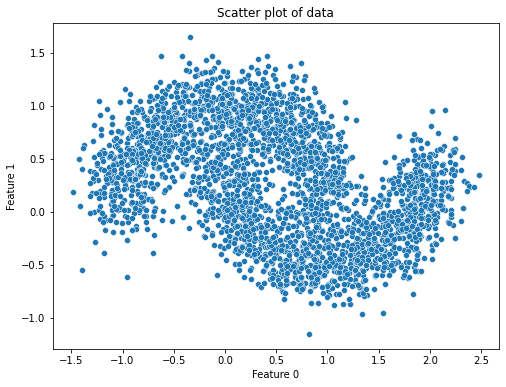

In [3]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=df[0], y=df[1])
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of data")
# ax.legend(title="Class Labels")
plt.show()

## Kmeans

In [4]:
from sklearn.cluster import KMeans

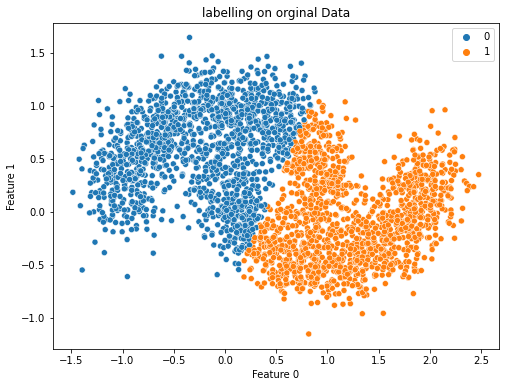

In [5]:
model = KMeans(n_clusters=2)
model = model.fit(df)
pred = model.predict(df)
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="labelling on orginal Data")
# ax.legend(title="Class Labels")
plt.show()

## Kmeans++

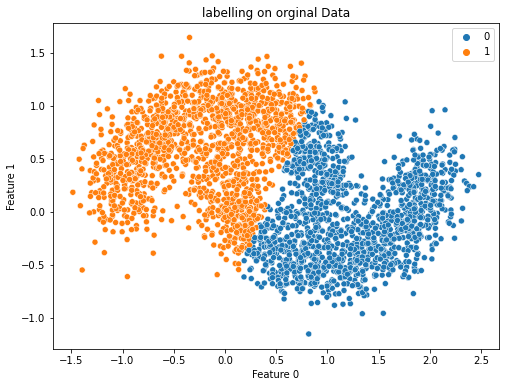

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2,init = 'k-means++',n_init=50).fit(df)
pred = model.predict(df)
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="labelling on orginal Data")
plt.show()

## MeanShift

In [7]:
from sklearn.cluster import MeanShift

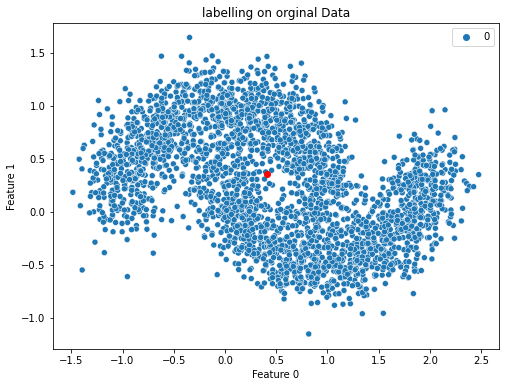

In [8]:
ms = MeanShift(bin_seeding=True)
ms.fit(df)
cluster_centers = ms.cluster_centers_
labels = ms.labels_
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = labels)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="labelling on orginal Data")
plt.scatter(cluster_centers[0][0],cluster_centers[0][1],c = 'r')
plt.show()

## Gaussian Mixture Model

In [9]:
from sklearn.mixture import GaussianMixture

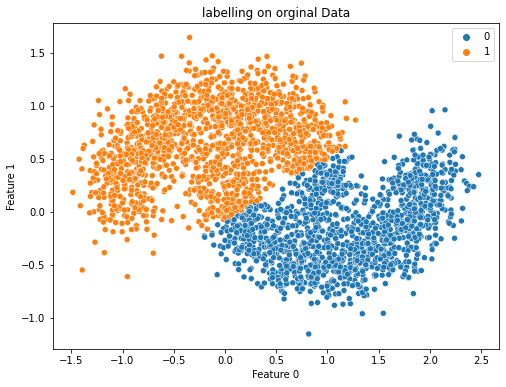

In [10]:
GMM = GaussianMixture(n_components=2,init_params='kmeans',max_iter=2000,n_init=5).fit(df)

pred = GMM.predict(df)
# pred
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="labelling on orginal Data")
# ax.legend(title="Class Labels")
plt.show()

## Agglomerative Clustering

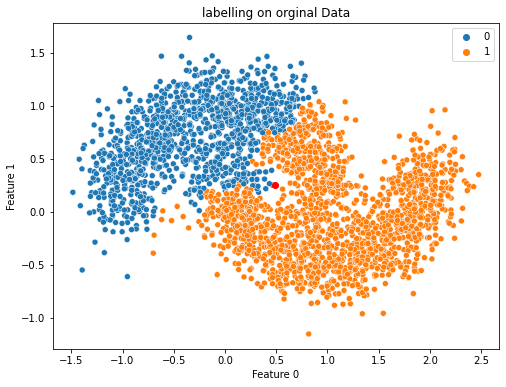

In [11]:
from sklearn.cluster import AgglomerativeClustering

dfr = pd.DataFrame()
meanx = df[0].mean()
meany = df[1].mean()

clustering = AgglomerativeClustering(n_clusters=2, linkage="average",affinity="manhattan")
Y_preds = clustering.fit_predict(df)

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = Y_preds)
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="labelling on orginal Data")
# ax.legend(title="Class Labels")
plt.scatter(meanx,meany,c='r')
plt.show()

## DBSCAN

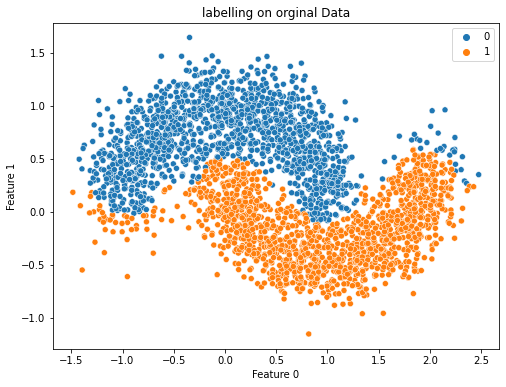

In [12]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 0.2,min_samples=75).fit(df)
predictions_db = model.labels_


x = pd.DataFrame(df)
meanx = x[0].mean()
meany = x[1].mean()

pred_db = pd.DataFrame(np.zeros(3000))
pred_db[0] = [1 if (x[1][i] <= meany) and (predictions_db[i] == -1) else predictions_db[i] for i in range(len(x))]
pred_db[0] = [0 if (x[1][i] > meany) and (pred_db[0][i] == -1) else pred_db[0][i] for i in range(len(x))]
pred_db = pred_db.values.ravel()
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = pred_db,palette='tab10')
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="labelling on orginal Data")
# ax.legend(title="Class Labels")
# plt.scatter(meanx,meany,c='r')
plt.show()

## Spectral Clustering

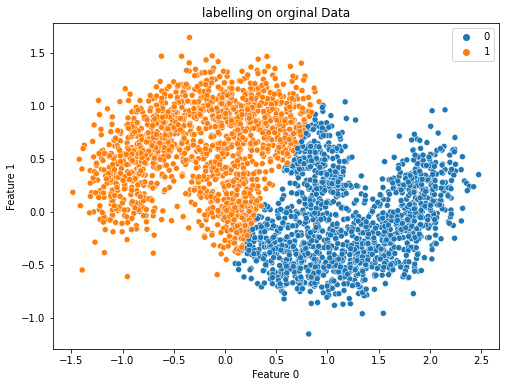

In [13]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters = 2,assign_labels='kmeans').fit(df)
pred = model.labels_
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = pred)
# ax2 = sns.scatterplot(data=X_testr, x=1, y=2,hue = pred)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="labelling on orginal Data")
# ax.legend(title="Class Labels")
# plt.scatter(meanx,meany,c='r')
plt.show()

## Data Transformation

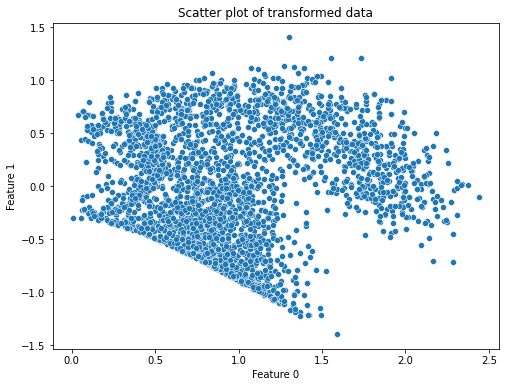

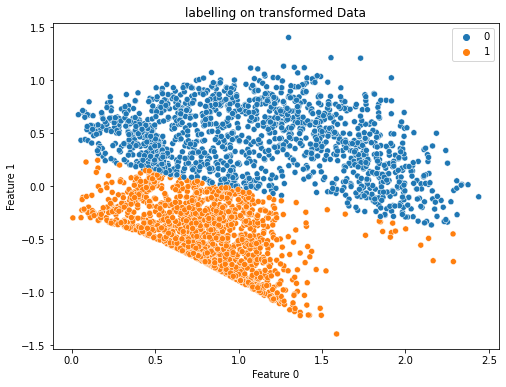

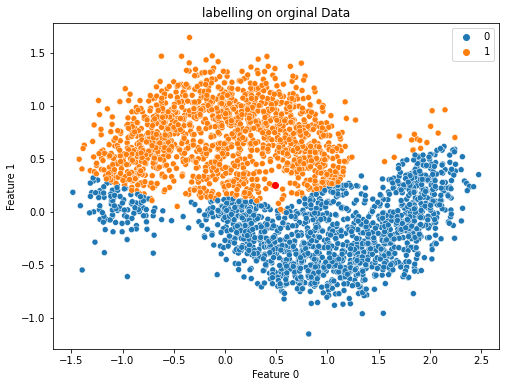

In [14]:
dfr = pd.DataFrame()
meanx = df[0].mean()
meany = df[1].mean()
# dfr[0] = np.sqrt(np.abs(df[0]**2 - df[0].mean()**2))
dfr[0] = np.sqrt(np.abs((df[0]**2 - df[0].mean()**2)+(df[1]**2 - df[1].mean()**2)))
dfr[1] = meany - df[1] 
# dfr[0] =np.sin(df[0])*np.cos(df[1])
# dfr[0] = np.sqrt(np.abs(df[0]**2 - df[0].mean()**2))

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=dfr, x=0, y=1)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="Scatter plot of transformed data")
# ax.legend(title="Class Labels")
plt.show()


model = KMeans(n_clusters=2)
model = model.fit(dfr)
predictions = model.predict(dfr)
plt.figure(figsize=(8, 6))
ax2 = sns.scatterplot(data=dfr, x=0, y=1,hue = predictions)
ax2.set(xlabel="Feature 0", ylabel="Feature 1", title="labelling on transformed Data")
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x=0, y=1,hue = predictions)
ax.set(xlabel="Feature 0", ylabel="Feature 1", title="labelling on orginal Data")
# ax.legend(title="Class Labels")
plt.scatter(meanx,meany,c='r')
plt.show()


## Saving the predicted Class Labels

In [ ]:
np.savetxt("data_predicted_labels.txt",pred_db , delimiter="\n", fmt="%.0f")